In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Analysis

In [8]:
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1') 
data = df.values

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanR,5656.0,20.894382,5.260718,6.854176,17.015386,20.055104,23.933250,46.994451
meanG,5656.0,18.023509,3.885058,6.259336,15.462487,17.823574,20.508286,37.866338
meanB,5656.0,5.562521,1.572465,1.823841,4.469088,5.206807,6.298417,14.023399
stdR,5656.0,49.518673,9.091646,23.889681,42.518804,48.737837,55.533851,78.573397
stdG,5656.0,43.181128,5.799811,21.816707,39.565446,43.274979,47.258675,63.912439
stdB,5656.0,16.216090,2.737406,7.831019,14.261454,15.830328,17.684630,29.260652
skewR,5656.0,2.164332,0.298941,1.154889,1.962475,2.147151,2.337118,3.582313
skewG,5656.0,2.232326,0.340901,1.203163,2.003130,2.188874,2.405244,3.997579
skewB,5656.0,3.745612,0.647198,1.944842,3.304125,3.764237,4.170742,7.961952
kurR,5656.0,3.208423,1.533598,-0.531692,2.161075,3.023438,3.989808,12.941081


In [13]:
print(df['Class'].drop_duplicates())


0       1
448     2
2185    3
2576    4
4085    5
4459    6
Name: Class, dtype: int64


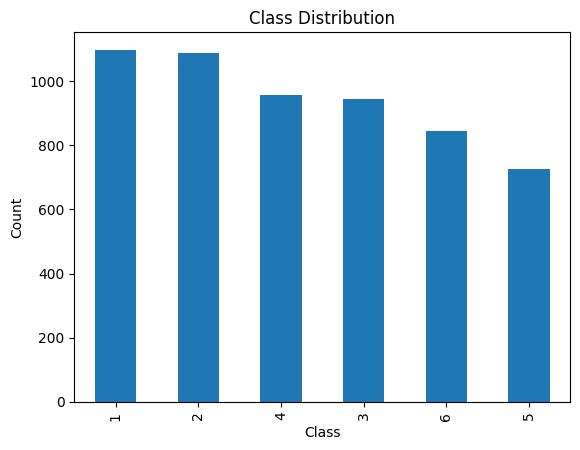

In [ ]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [6]:
class SOMlinier:
    def __init__(self, n_neurons, input_dim, radius0, alpha0, tau):
        self.n_neurons = n_neurons
        self.input_dim = input_dim
        self.weights = np.random.rand(n_neurons, input_dim)
        self.radius0 = radius0
        self.alpha0 = alpha0
        self.tau = tau
    
    def cari_bmu(self, x):
        distances = np.linalg.norm(self.weights - x, axis=1)
        return np.argmin(distances)
    
    def update_bobot(self, x, bmu_index, radius, alpha):
        for i in range(self.n_neurons):
            distance = abs(i-bmu_index)
            if distance <= radius:
                influence = np.exp(-distance**2 / (2*(radius**2)))
                self.weights[i] += alpha * influence * (x - self.weights[i])
                
    def reduce_topology(self, iteration):
        radius = self.radius0 * np.exp(-iteration / self.tau)
        return radius

    def train(self, data, n_iterations):
        for t in range(n_iterations):
            x = data[np.random.randint(0, len(data))]
            bmu_index = self.cari_bmu(x)
            radius = self.reduce_topology(t)
            alpha = self.alpha0 * np.exp(-t / self.tau)
            self.update_bobot(x, bmu_index, radius, alpha)

In [16]:

# Parameters for SOM
n_neurons = 10             # Number of neurons in the linear SOM
input_dim = data.shape[1]  # Dimension of each input vector (number of features)
radius0 = 3               # Initial radius
alpha0 = 0.5              # Initial learning rate
tau = 1000                 # Time constant for radius reduction

# Initialize the SOM
som = SOMlinier(n_neurons=n_neurons, input_dim=input_dim, radius0=radius0, alpha0=alpha0, tau=tau)

# Train the SOM with the dataset
n_iterations = 1000  # Number of iterations
som.train(data, n_iterations)

# After training, you can access the SOM weights with:
weights = som.weights
print("Trained SOM weights:", weights)

Trained SOM weights: [[29.57377233 23.1774052   7.90818686 64.26382922 50.99933883 20.27787708
   1.81874015  1.90250031  2.96518922  1.53142361  1.97197627  8.9451697
  11.42916248 11.41661859 11.25401568  3.48617798]
 [27.72527747 22.13277556  7.12063268 61.65573437 49.81369219 19.09049644
   1.88908579  1.96907446  3.16075333  1.81908573  2.25206711 10.36066131
  11.38961803 11.37766116 11.18360464  3.52941524]
 [24.48293492 20.25812534  6.46559878 56.82451433 47.44322525 17.96703457
   2.00709116  2.06943994  3.25090341  2.30032106  2.64427477 11.10996643
  11.321229   11.31154888 11.12311416  3.40373047]
 [22.32460271 18.97052597  6.33715678 53.21292433 45.54915341 17.65527939
   2.10190547  2.15944933  3.24912074  2.76087142  3.08171764 11.28517354
  11.28187203 11.2717647  11.11095073  3.3232998 ]
 [20.83442483 17.38840684  6.14114709 50.97295503 42.9510313  17.53245232
   2.20929075  2.2890831   3.38585757  3.30207251  3.76932402 12.44339377
  11.24139089 11.22753097 11.0702247

In [19]:

# Visualisasi hasil SOM
def visualize_som(data, som):
    # Cari BMU untuk setiap data poin dan plotkan
    bmu_indices = [som.cari_bmu(x) for x in data]
    bmu_positions = som.weights[bmu_indices]
    
    plt.figure(figsize=(10, 6))
    
    # Plotkan neuron-neuron dalam SOM
    plt.plot(som.weights[:, 0], som.weights[:, 1], 'bo-', markersize=8, label="Neurons")
    
    # Plotkan data dan hubungkan ke BMU-nya masing-masing
    for i, x in enumerate(data):
        plt.plot([x[0], bmu_positions[i][0]], [x[1], bmu_positions[i][1]], 'k-', alpha=0.2)
        plt.plot(x[0], x[1], 'ro', markersize=4, alpha=0.5, label="Data" if i == 0 else "")
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("SOM Linear with Data Mapped to Neurons")
    plt.show()


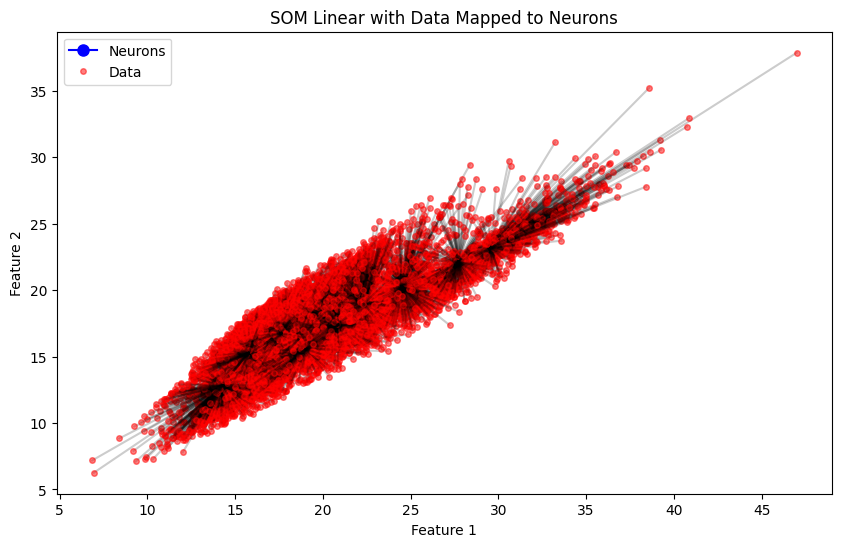

In [20]:

# Panggil fungsi visualisasi
visualize_som(data, som)